In [1]:
import requests
import warnings
from bs4 import BeautifulSoup
import pandas as pd

warnings.filterwarnings(action='ignore')

r = requests.get('https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/')
soup = BeautifulSoup(r.content)
table = soup.find('table')
tbody = table.find('tbody')
rows = tbody.find_all('tr')
data = []
for row in rows:
    item = {}
    cells = row.find_all('td')
    item['country'] = cells[0].get_text()
    item['cases'] = int(cells[1].get_text().replace(',',''))
    item['deths'] = int(cells[2].get_text().replace(',',''))
    item['region'] = cells[3].get_text()
    data.append(item)
df = pd.DataFrame(data)
df

,country,cases,deths,region
0,United States,24591412,408237,North America
1,India,10582647,152593,Asia
2,Brazil,8511770,210299,South America
3,Russia,3591066,66037,Europe
4,United Kingdom,3433494,89860,Europe
...,...,...,...,...
215,Marshall Islands,4,0,Australia/Oceania
216,Wallis & Futuna,4,0,Australia/Oceania
217,Samoa,2,0,Australia/Oceania
218,Vanuatu,1,0,Australia/Oceania


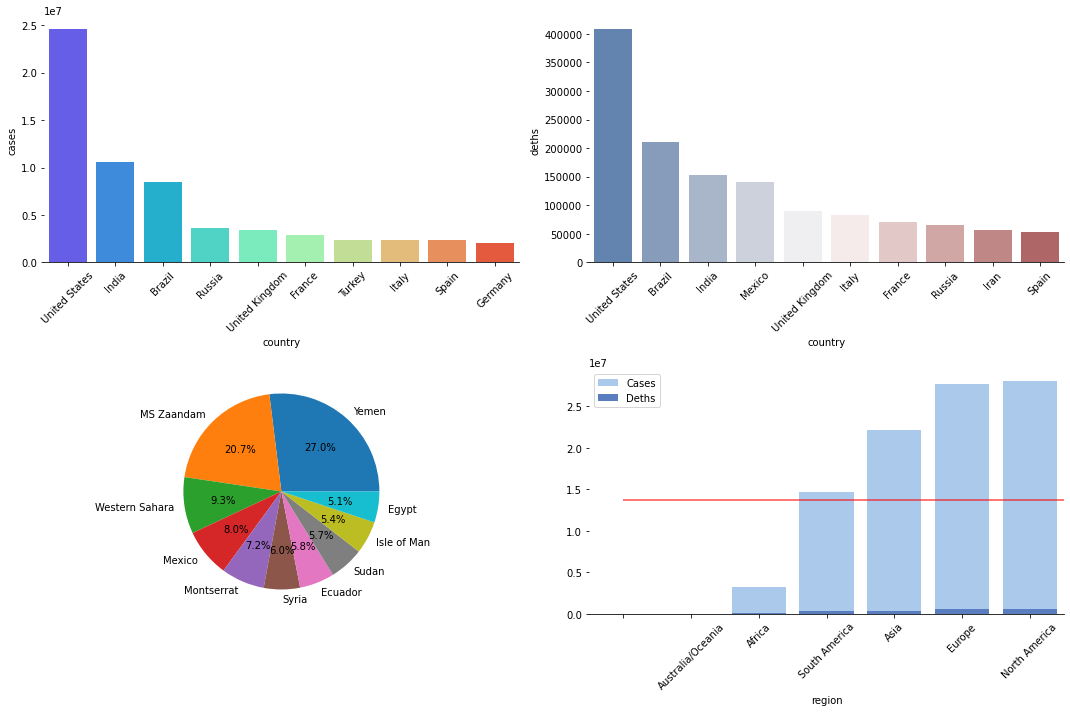

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(15,10))
# Plot 1
plt.subplot(221)
plt.xticks(rotation=45)

df = df.sort_values('cases', ascending=False)
sns.barplot(x='country', y='cases', palette="rainbow", data=df.iloc[:n])
# Plot 2
plt.subplot(222)
plt.xticks(rotation=45)

df = df.sort_values('deths', ascending=False)
sns.barplot(x='country', y='deths', palette="vlag", data=df.iloc[:n])
# Plot 3
plt.subplot(223)
plt.xticks(rotation=45)

df['depths_to_cases_ratio'] = df['deths'] / df['cases']
df = df.sort_values('depths_to_cases_ratio', ascending=False)
plt.pie(x='depths_to_cases_ratio', labels='country', autopct="%.1f%%", data=df.iloc[:n])
# Plot 4
plt.subplot(224)
plt.xticks(rotation=45)

df_gb_region = df.groupby('region').sum().reset_index().sort_values('cases')
cases_mean = df_gb_region['cases'].mean()
num_of_regions =  df_gb_region['region'].nunique()
# Draw mean cases line
plt.hlines(cases_mean, 0, num_of_regions, alpha = .7, color='red')
# Draw deths bar over cases bar
sns.set_color_codes("pastel")
sns.barplot(x="region", y="cases", data=df_gb_region,
            label="Cases", color="b")
sns.set_color_codes("muted")
sns.barplot(x="region", y="deths", data=df_gb_region,
            label="Deths", color="b")
plt.ylabel('')

# Overall properties
plt.legend()
sns.despine(left=True)
plt.tight_layout()